In [29]:
import pandas as pd
import numpy as np
import seaborn as sns

sns.set(rc={'figure.figsize': (40, 15)}, font_scale=1.5)

df = pd.read_csv('ECH_2019.csv')

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 107871 entries, 0 to 107870
Data columns (total 18 columns):
 #   Column                             Non-Null Count   Dtype 
---  ------                             --------------   ----- 
 0   id_hogar                           107871 non-null  int64 
 1   sexo                               107871 non-null  object
 2   edad                               107871 non-null  int64 
 3   ascendencia                        107871 non-null  object
 4   parentesco                         107871 non-null  object
 5   estado_laboral                     107871 non-null  object
 6   sueldo                             107871 non-null  int64 
 7   busca_otro_trabajo                 107871 non-null  object
 8   actividad                          107871 non-null  object
 9   asistencia alguna vez a enseñanza  107871 non-null  object
 10  edu preescolar                     107871 non-null  object
 11  edu primaria                       107871 non-null  

In [30]:
df.sample(5)

,id_hogar,sexo,edad,ascendencia,parentesco,estado_laboral,sueldo,busca_otro_trabajo,actividad,asistencia alguna vez a enseñanza,edu preescolar,edu primaria,edu media,edu técnica,edu univ o simil,edu terciario no uni,edu posgrado,edu mag prof
7106,2019003793,Mujer,17,Blanca,Hijo/a solo del jefe/a,Inactivo: estudiante,0,0,.,Sí,"Sí, asistió","Sí, asistió",Asiste actualmente,No asistió,0,0,0,0
70263,2019037835,Hombre,12,Blanca,Nieto/a,Menores de 14 años,0,0,.,Sí,"Sí, asistió","Sí, asistió",Asiste actualmente,0,0,0,0,0
36701,2019019753,Mujer,67,Blanca,Jefe/a de hogar,Ocupados,13800,Sí,Actividades de los hogares en calidad de emple...,Sí,No asistió,"Sí, asistió",0,No asistió,0,0,0,0
33285,2019017938,Mujer,2,Blanca,Hijo/a de ambos,Menores de 14 años,0,0,.,No,0,0,0,0,0,0,0,0
62131,2019033406,Hombre,2,Blanca,Hijo/a de ambos,Menores de 14 años,0,0,.,Sí,0,No asistió,0,0,0,0,0,0


In [31]:
no_data = {0: 'No hay dato', '0': 'No hay dato'}

mask = df.columns.difference(['edad', 'sueldo', 'hijos'])

df[mask] = df[mask].replace(no_data)

df.sample(5)

,id_hogar,sexo,edad,ascendencia,parentesco,estado_laboral,sueldo,busca_otro_trabajo,actividad,asistencia alguna vez a enseñanza,edu preescolar,edu primaria,edu media,edu técnica,edu univ o simil,edu terciario no uni,edu posgrado,edu mag prof
9746,2019005220,Mujer,63,Blanca,Jefe/a de hogar,Inactivo: jubilado,0,No hay dato,.,Sí,No asistió,"Sí, asistió","Sí, asistió",No asistió,"Sí, asistió",No asistió,No hay dato,No asistió
87014,2019046867,Mujer,23,Blanca,Hijo/a de ambos,Desocupados buscan trabajo por primera vez,0,No hay dato,.,Sí,"Sí, asistió","Sí, asistió","Sí, asistió",No asistió,Asiste actualmente,No asistió,No hay dato,No asistió
73025,2019039352,Mujer,12,Blanca,Hijo/a de ambos,Menores de 14 años,0,No hay dato,.,Sí,"Sí, asistió","Sí, asistió",Asiste actualmente,No hay dato,No hay dato,No hay dato,No hay dato,No hay dato
45681,2019024570,Mujer,73,Blanca,Jefe/a de hogar,Inactivo: pensionista,0,No hay dato,.,Sí,No asistió,"Sí, asistió","Sí, asistió",No asistió,No hay dato,No hay dato,No hay dato,No hay dato
85601,2019046103,Mujer,44,Afro o negra,Esposo/a o compañero/a,Ocupados,22000,No,Actividades de los hogares en calidad de emple...,Sí,"Sí, asistió","Sí, asistió","Sí, asistió",No asistió,No hay dato,No hay dato,No hay dato,No hay dato


<AxesSubplot:xlabel='estado_laboral', ylabel='count'>

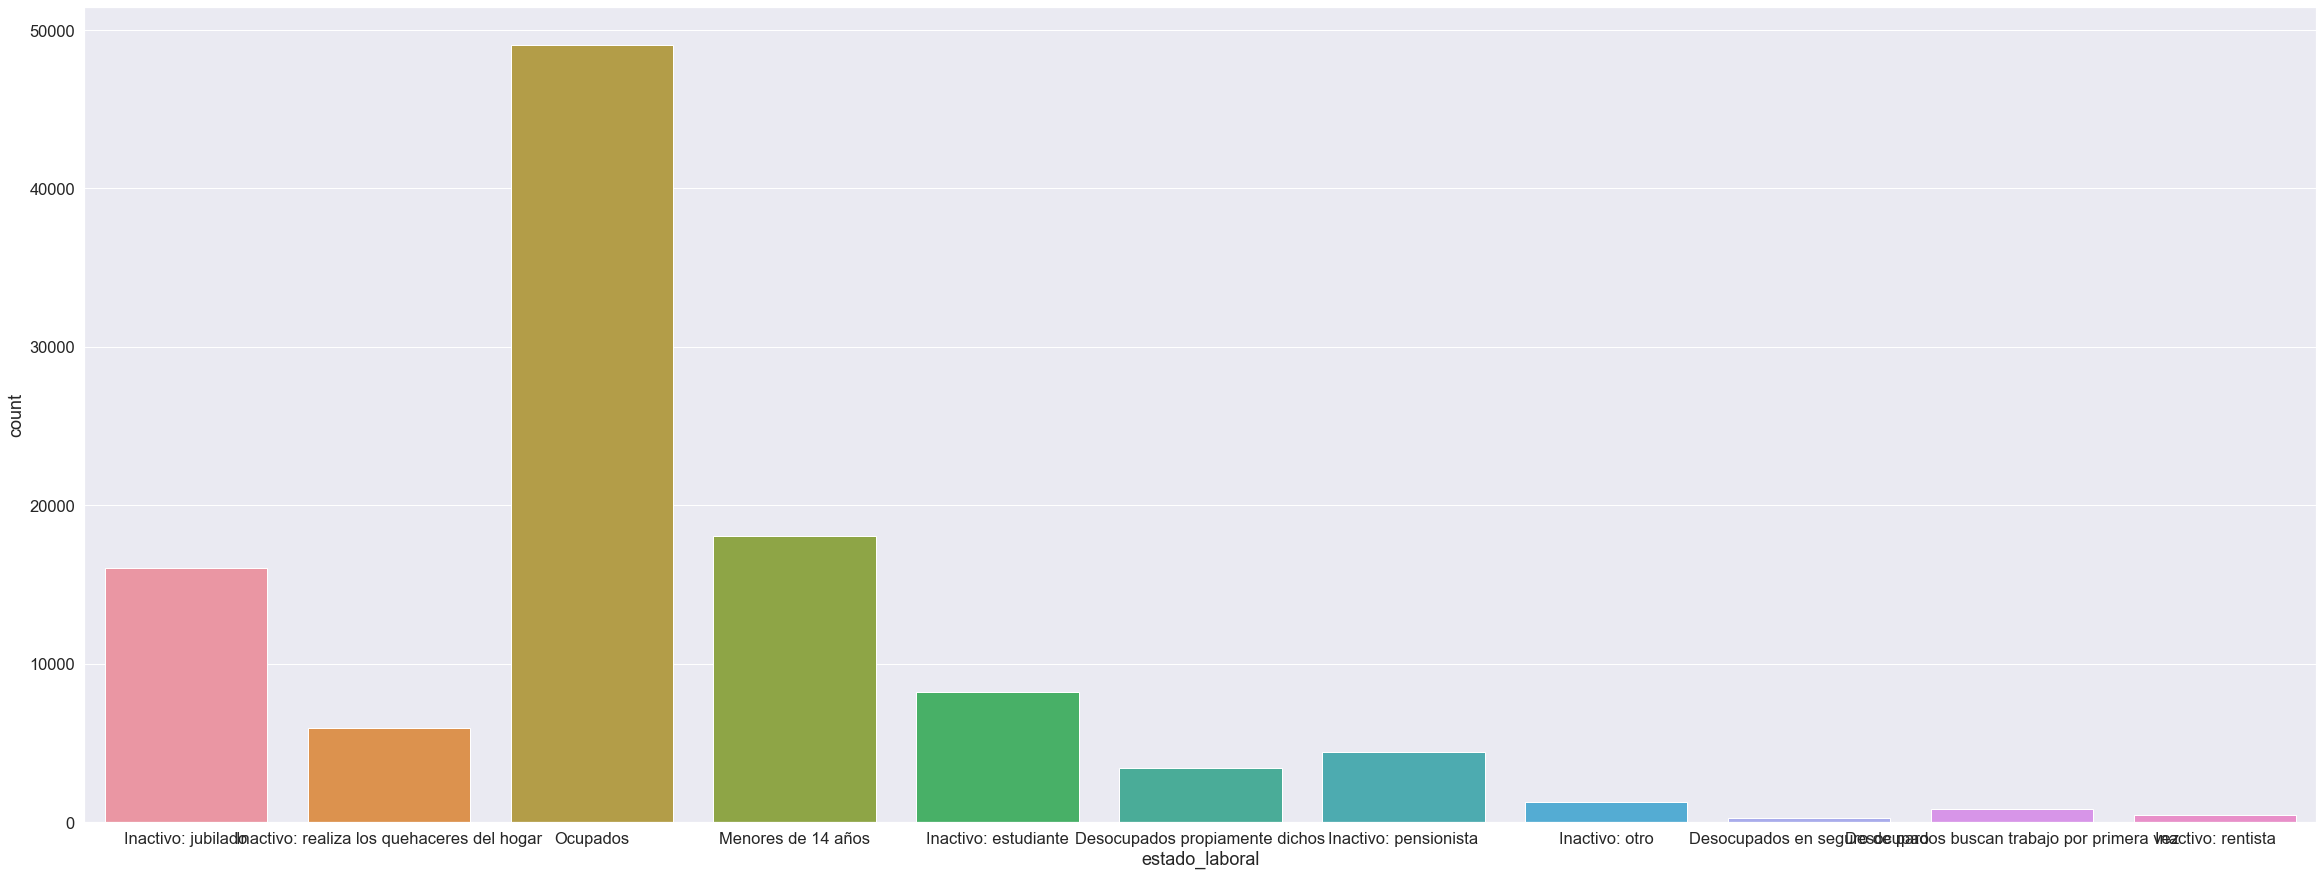

In [32]:
sns.countplot(x=df['estado_laboral'])

Seleccionamos personas con edad suficiente para trabajar

In [5]:
df = df[~df['estado_laboral'].str.contains('Menores de 14 años')]

Codificamos los valores de parentezco

In [6]:
df['parentesco_num'] = df['parentesco'].astype('category').cat.codes

df[['parentesco_num', 'parentesco']].value_counts()

parentesco_num  parentesco                             
6               Jefe/a de hogar                            42507
1               Esposo/a o compañero/a                     22574
3               Hijo/a de ambos                             9558
5               Hijo/a solo del jefe/a                      8574
10              Padre/madre                                 1148
7               Nieto/a                                     1107
4               Hijo/a solo del esposo/a compañero/a        1104
2               Hermano/a                                    920
13              Yerno/nuera                                  766
8               Otro no pariente                             583
9               Otro pariente                                556
12              Suegro/a                                     254
0               Cuñado/a                                     140
11              Servicio doméstico o familiar del mismo       16
dtype: int64

Creamos una columna que cuenta la cantidad de hijos por grupo familiar

In [7]:
df['hijos'] = (
    df.groupby('id_hogar')['id_hogar'].transform('count') - 1
)

# CATEGORIZAR NUMERICOS

In [8]:
df['rango_sueldos'] = pd.cut(df['sueldo'], bins=[
    0,
    5000,
    10000,
    30000,
    50000,
    100000,
    float('Inf'),
    ])


# labels=['0-5000', 'yyy', 'zzz']

<AxesSubplot:xlabel='rango_sueldos', ylabel='count'>

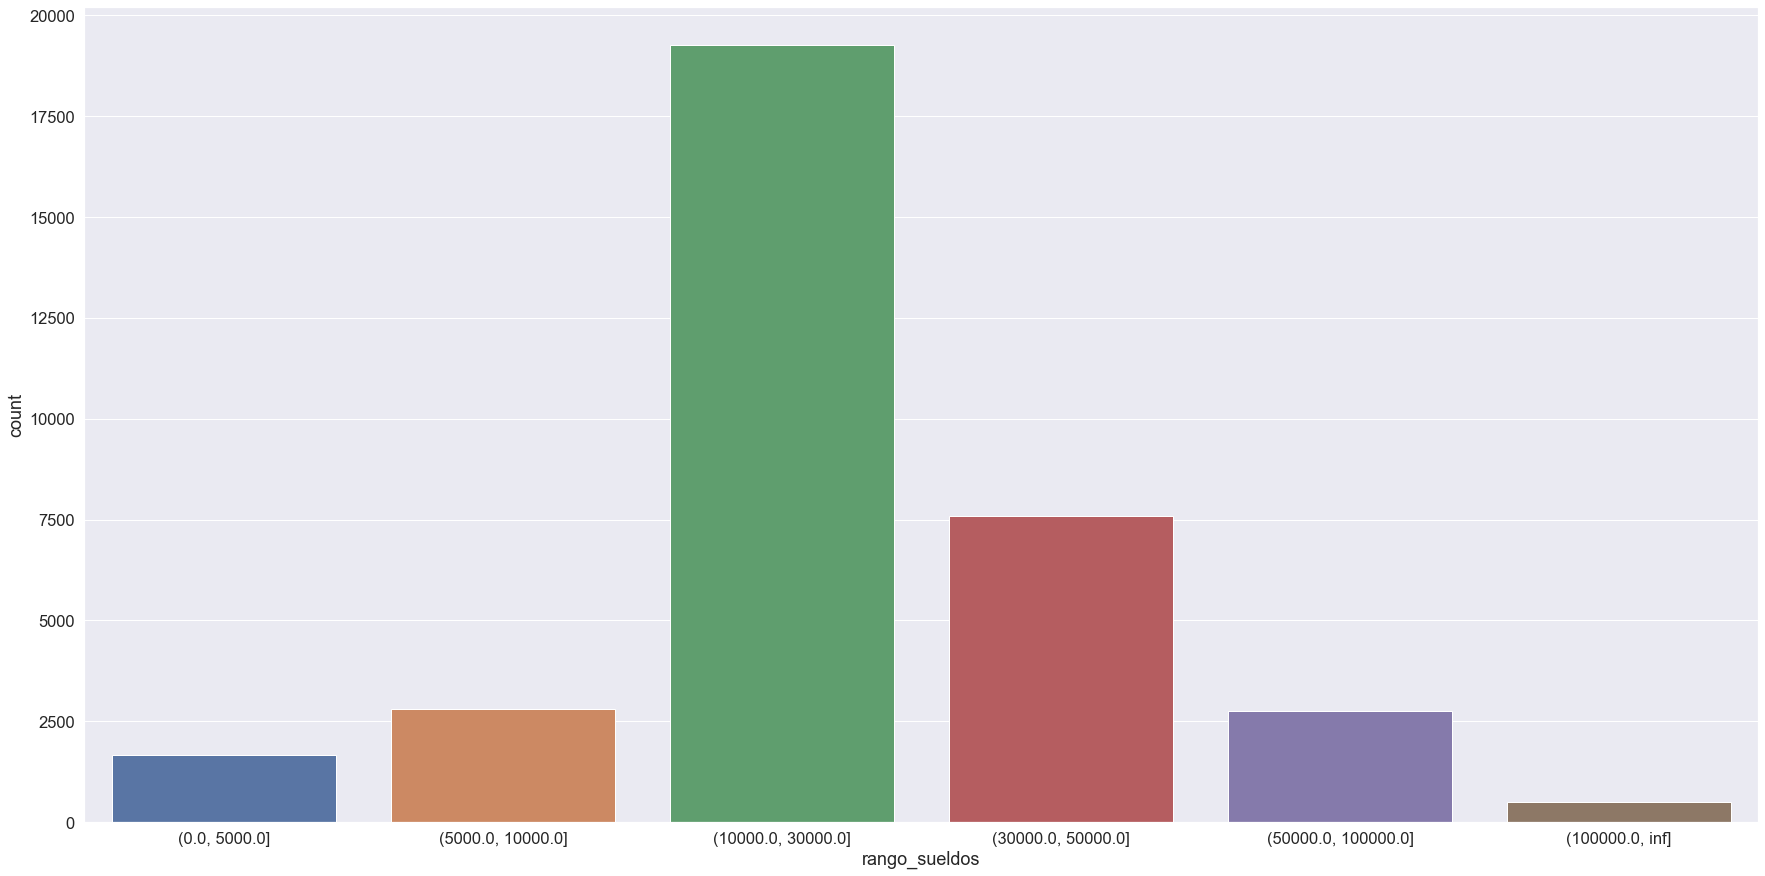

In [27]:
sns.countplot(x=df['rango_sueldos'])

### AJUSTANDO DATOS PARA ENTRENAR EL MODELO

Primero encodificamos las variables categóricas

In [ ]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

df = df.apply(le.fit_transform)

df.head(5)

### Creamos un mapa de correlación para investigar la relación entre las variables

In [ ]:
corr = df.corr()
sns.heatmap(corr, xticklabels=corr.columns.values, yticklabels=corr.columns.values, annot=True)

### DEFINIMOS LAS VARIABLES DEPENDIENTES E INDEPENDIENTES

In [ ]:
# Feautures
X = df.drop('estado_laboral', axis=1)
y = df['estado_laboral']

print('X shape', X.shape, '\nY shape', y.shape)

In [ ]:
np.unique(y)

### Dividimos los datos en un 30% de test y 70% de entrenamiento

In [ ]:
from sklearn.model_selection import train_test_split 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42) 

In [ ]:
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

### DEFINIMOS ALGORITMO DE REFRESIÓN LOGISTICA Y VALOR DE CROSS VALIDATION PARA CADA FOLD

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

log_reg = LogisticRegression(max_iter=20000)

clf = log_reg.fit(X_train.astype('int'), y_train.astype('int'))

scores = cross_val_score(clf, X.astype('int'), y.astype('int'), cv=10)

scores

Promedio de scores en el Cross Validation

In [ ]:
scores.mean()

Scores de cada clasificación

In [ ]:
clf.score(X_test, y_test)

In [ ]:
clf.score(X_train, y_train)

### DEFINIMOS UNA PREDICCIÓN Y LA APLICAMOS SOBRE EL MODELO

In [ ]:
prediction = np.array([10000, 20000, 5000, 80000, 3000, 100,30000]).reshape(-1,1)
log_reg.predict(prediction)

### INVESTIGAMOS LA EFECTIVIDAD DEL MODELO SOBRE LOS DATOS

In [ ]:
from sklearn.metrics import accuracy_score

#Prediccion en Train
y_train_pred = log_reg.predict(X_train)

#Prediccion en Test
y_test_pred = log_reg.predict(y_test.reshape(-1, 1))

#Calculo el accuracy en Train
train_accuracy = accuracy_score(y_train, y_train_pred)

#Calculo el accuracy en Test
test_accuracy = accuracy_score(y_test, y_test_pred)

print('% de aciertos sobre el set de entrenamiento:', train_accuracy)
print('% de aciertos sobre el set de evaluación:',test_accuracy)

Determinamos la probabilidad de la predicción

In [ ]:
probabilidades_prediccion = log_reg.predict_proba(prediction)
probabilidades_prediccion[:,1]